<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование и анализ данных о продаж интернет-магазина «Стримчик»

В настоящем проекте нам предстоит сделать  анализ продаж интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Доступны данные из открытых источников: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Наша задача -  нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных 

**Таблица games.csv**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv') #, index_col=0) #, sep = '\t')
# df.reset_index()
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных • Name — название игры • Platform — платформа • Year_of_Release — год выпуска • Genre — жанр игры • NA_sales — продажи в Северной Америке (миллионы проданных копий) • EU_sales — продажи в Европе (миллионы проданных копий) • JP_sales — продажи в Японии (миллионы проданных копий) • Other_sales — продажи в других странах (миллионы проданных копий) • Critic_Score — оценка критиков (максимум 100) • User_Score — оценка пользователей (максимум 10) • Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.duplicated().sum()

0

Таблица содержит пропуски в столбцax Genre, Year_of_Release, Critic_Score, User_Score, Rating. 
Датафрейм содержит 1002 явных дубликата. 
Данные в столбце 'Year_of_Release'  являются датами, выраженными целым числом (год), необходимо изменить тип данных.
В столбцах first_name и 'last_name' данные представлены строками в разных регистрах.
В наименованиях столбцов сочетание строчных и прописных букв, в остальном используется "змеиный" стиль, наименования соотносятся с информацией в столбцах по смыслу.

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод** Таблица содержит пропуски в столбцax Genre, Year_of_Release, Critic_Score, User_Score, Rating. Датафрейм содержит 1002 явных дубликата. Данные в столбце 'Year_of_Release' являются датами, выраженными целым числом (год), необходимо изменить тип данных. В столбцах first_name и 'last_name' данные представлены строками в разных регистрах. В наименованиях столбцов сочетание строчных и прописных букв, в остальном используется "змеиный" стиль, наименования соотносятся с информацией в столбцах по смыслу. Необходима предобработка данных.

##  Предобработка данных

### Удаление дубликатов

In [6]:
df = df.drop_duplicates()

In [7]:
df[df['Name'] == 'Ready 2 Rumble Boxing']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1906,Ready 2 Rumble Boxing,PS,1998.0,Sports,0.60,0.41,0.0,0.07,NaN,NaN,NaN
3403,Ready 2 Rumble Boxing,N64,1999.0,Sports,0.47,0.11,0.0,0.01,NaN,NaN,NaN


Первоначально удаленные дубликаты были ненастоящими. Всего лишь кривое использование индексов  - и вот уже неправильные пчелы сделали неправильный мёд. На примере выбранной игры видно, что это игра для двух разных платформ, разница в дате релиза, в продажах.  Анализируем дальше!


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Дубликаты удалены, плюс - исчезла часть пропусков, но большая часть - осталась.

### Изменение типа данных

Заменим названия столбцов, приведя их все к нижнему регистру:

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразуем тип данных. Так как данные в столбце 'Year_of_Release'  являются датами, выраженными целым числом (год), необходимо изменить тип данных. Исправим методом astype, так как у нас уже числа float в столбце, применим Int64, чтобы избежать ошибки, связанной с пропусками:

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Столбец df['User_Score'] имеет тип object, хотя должен содержать цифры. 


In [11]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Почти четверть значений - tbd. Несмотря на то, что у него есть смысловая нагрузка to be determinded, по факту, на момент составления таблицы рейтинг не определен, а, значит, значение просто отсутствует. Заменим такие значения на Nan:

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Изменим тип данных в столбце методом to_numeric:

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [14]:
df['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

Отлично, наш столбец теперь float!

### Обработка пропусков

первый столбец с пропусками - df['year_of_release'], год выпуска игры. Анализ показал, что нам не к чему привязать  пропущенные значения - год в наименовании игры не всегда соотносится с годом выпуска, часто содержит сторонние значения. Проверим, какова доля пропусков:

In [15]:
print(f'Доля пропусков в стобце составляет {(df["year_of_release"].isna().sum())/df.shape[0]*100} процентов' )
#df["year_of_release"].isna().sum()

Доля пропусков в стобце составляет 1.609332934489979 процентов


Доля пропусков несущественна, принимаем решение оставить пропуски без изменения.

Обратимся к пропускам в столбцах 'сritic_score', 'user_score', 'rating. Количество заполненных ячеек - 
critic_score       8137 non-null float64
user_score         9937 non-null object
rating             9871 non-null object
А незаполненных:

In [16]:
print(df[['critic_score', 'user_score', 'rating']].isna().sum())

critic_score    8578
user_score      9125
rating          6766
dtype: int64


У нас больше всего пропусков в столбце оценки  рейтинга игры. Рейтинг ESRB, который представлен в столбце - это рейтинговая система для  США, Канады и Мексики. Во многих других регионах используются другие, свои собственные системы.
Проверим гипотезу, что наши пропуски  связаны с продажами в определенных регионах. 

In [17]:
print(df[(df['na_sales']== 0)&(df['eu_sales']> 0)]['rating'].count())
df[(df['na_sales']== 0)&(df['eu_sales']> 0)]['rating'].isna().sum()

643


463

In [18]:
print(df[(df['na_sales']> 0)&(df['eu_sales']== 0)]['rating'].count())
df[(df['na_sales']> 0)&(df['eu_sales']== 0)]['rating'].isna().sum()

2000


468

In [19]:
print(df[(df['na_sales']== 0)&(df['eu_sales']== 0)]['rating'].count())
df[(df['na_sales']== 0)&(df['eu_sales']== 0)]['rating'].isna().sum()

133


3269

In [20]:
df[(df['na_sales']== 0)&(df['eu_sales']== 0)]['rating'].value_counts()


T       87
E       25
E10+    12
M        9
Name: rating, dtype: int64

То есть если игра не продается в США и ЕС, то она почти не оценена по рейтингу ESRB. Принимаем решение не заполнять пропуски. 

Принимаем очевидное решение заполнить эти пропуски в рейтинге значением RU - rating undefined


In [21]:
df['rating'] = df['rating'].fillna('RU')

In [22]:
df['rating'].value_counts()

RU      6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Решение не заполнять пропуски остается по столбцам user_score и critic_score. Мы можем пытаться найти корреляции и определить, от чего зависят оценки. Но во-первых у нас есть малораспространенные игры, по которым мало или совсем нет отзывов. Учитывая, что нам предстоит оценить гипотезы о рейтингах платформ Xbox One и PC. В общем, попытка слепить и расставить рейтинг кажется здесь неуместной, хотя в предыдущих проектах я всегда заполняла пропуски.

In [23]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [24]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RU
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RU


### Добавление столбца с объемом продаж

Рассчитаем суммарные продажи во всех регионах:

In [25]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  sales            16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


**Вывод** Выполнена Предобработка данных. Удалены дубликаты. Изменен тип данных: названия столбцов приведены к нижнему регистру; данные в столбце 'Year_of_Release' заменены на целочисленные с помощью метода astype, Int64, чтобы избежать ошибки, связанной с пропусками. Столбец df['User_Score'] приведен к числовым значениям. 
Произведены анализ и последующая обработка пропусков. Произведена оценка доли пропусков и их влияния на достоверность информации. Принято решение не заполнять пропуски, так как отсутствует базис для этого.
Рассчитан общий объем продаж. Данные готовы к исследовательскому анализу.


##  Исследовательский анализ данных

### Исследование продаж

Посмотрим, какое количество игр выпускалось в разные годы. 

In [26]:
#years = df.groupby('year_of_release')['sales'].count()
years = df.pivot_table(index= 'year_of_release',  values='sales', aggfunc='count') #.reset_index()
#years.columns = ['year', 'games']
years

,sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 1.0, 'Релизы игр по годам, единиц')

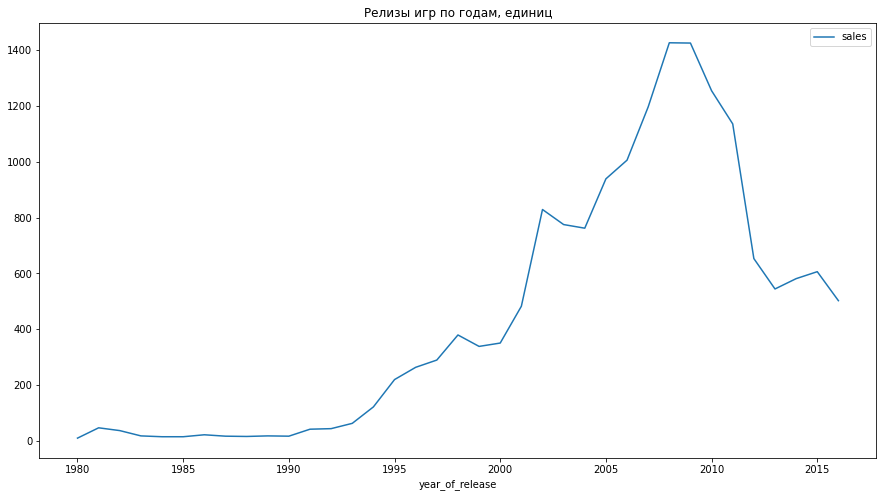

In [27]:
years.plot( figsize = (15, 8)).set_title('Релизы игр по годам, единиц')


График имеет ярко выраженный пик в 2008-2009 годах. Индустрия явно была на коне в те годы. Посмотрим на тепловую карту:

Text(0.5, 1.0, 'Тепловая карта продаж')

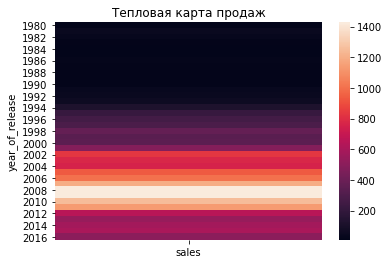

In [28]:
sns.heatmap(years).set_title('Тепловая карта продаж')

Лучшие годы - 2008 и 2009, а сейчас все темнеет. Неужели лучшие годы в прошлом? Но это без разбивки, посмотрим как менялись продажи по платформам.

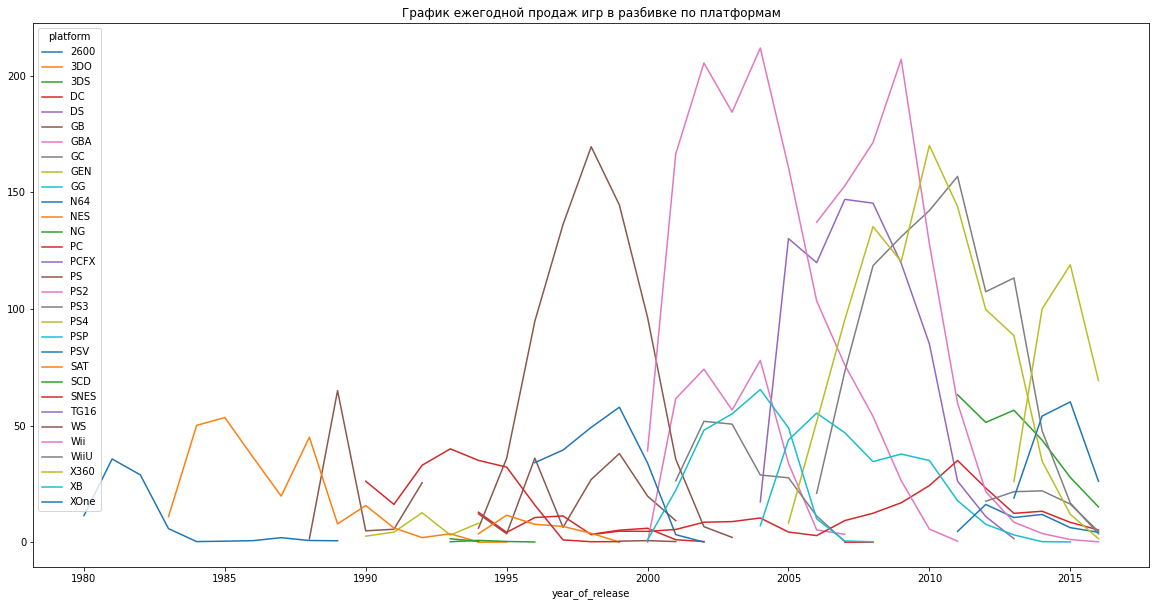

In [29]:
df.groupby(['platform', 'year_of_release'])['sales'].sum().unstack('platform').plot( figsize = (20, 10))

plt.title('График ежегодной продаж игр в разбивке по платформам')
plt.show()

Выявим платформы с наибольшими суммарными продажами 


In [30]:
df.groupby(['platform'])['sales'].sum().sort_values(ascending = False).head(15)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
Name: sales, dtype: float64

построим распределение по годам по наиболее весомым платформам в количестве 15 штук, **плюс XOne**, судя по графику - она из начинающих, а полных данных за 2016 еще нет, ее не теряем.

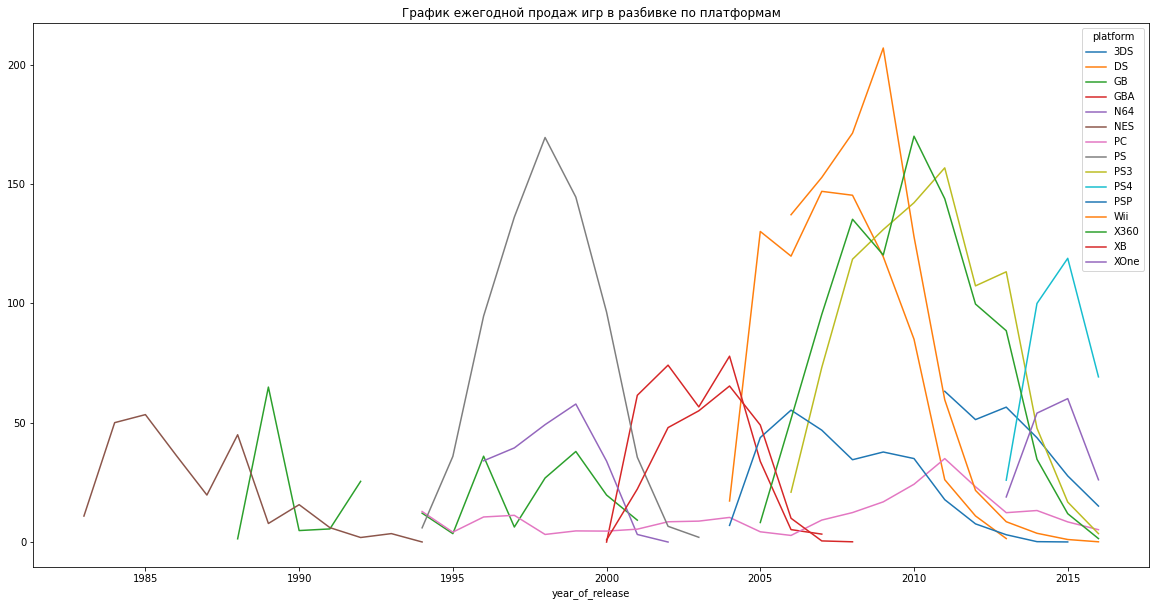

In [31]:
top_platforms = ['X360', 'PS3', 'Wii', 'XOne', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB', 'GB', 'NES', 'N64']
df[df['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['sales'].sum().unstack('platform').plot( figsize = (20, 10))
plt.title('График ежегодной продаж игр в разбивке по платформам')
plt.show()

X360 стремится к завешению жизненного цикла на исходе 10 летнего периода.  Жива и ps4 (куда без нее, до выхода ps5 еще долгих четыре года). Показалось, что еще жива PSP, но нет, именно показалось. В середине жизненного пути находится 3DS, стартовавшая с больших продаж и с тех пор снижающаяся почти без пика. Ну и вечноюный PC.

Да, 2008-2009 и здесь отчетливо показывают своё превосходство. Восемь платформ одновременно, стремительный рост. Кризис в реальном секторе - и стремительный взлет игр.

График наглядно показывает, что характерный срок за который исчезают старые платформы - 7 лет. Дальше тянется узкий хвост, поддерживаемый особыми ценителями. Новые платформы появляются регулярно, за 10 лет меняются 2 поколения. 

Проверим на цифрах

In [32]:
minmax = df.pivot_table(index= 'platform',  values= 'year_of_release', aggfunc=['min', 'max']).reset_index()
minmax.columns = ['platform', 'min', 'max']
minmax['life_period']= minmax['max'] - minmax['min']
minmax.sort_values( by = 'life_period', ascending =  False).head(15)

,platform,min,max,life_period
13,PC,1985,2016,31
4,DS,1985,2013,28
5,GB,1988,2001,13
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
11,NES,1983,1994,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10


Хм, какая ещё DS в 1985, эта платформа существует с 2004. Ошибка?

In [33]:
df[(df['platform']== 'DS')&(df['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RU,0.02


Да, это ошибка, игра всего одна и она для PC. Ни на что особо не повлияет, но исправим, раз нашлась.

In [34]:
df.loc[(df['platform']== 'DS')&(df['year_of_release'] < 2004), 'platform']= 'PC'

И пересчитаем

In [35]:
minmax = df.pivot_table(index= 'platform',  values= 'year_of_release', aggfunc=['min', 'max']).reset_index()
minmax.columns = ['platform', 'min', 'max']
minmax['life_period']= minmax['max'] - minmax['min']
minmax.sort_values( by = 'life_period', ascending =  False).head(36)

,platform,min,max,life_period
13,PC,1985,2016,31
5,GB,1988,2001,13
11,NES,1983,1994,11
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
3,DC,1998,2008,10
26,Wii,2006,2016,10
17,PS3,2006,2016,10
0,2600,1980,1989,9


In [36]:
minmax.describe()

,min,max,life_period
count,31.000000,31.000000,31.000000
mean,1998.258065,2005.258065,7.000000
std,8.850491,9.273503,5.899152
min,1980.000000,1989.000000,0.000000
25%,1993.000000,1996.000000,3.000000
50%,1998.000000,2007.000000,6.000000
75%,2004.500000,2016.000000,10.000000
max,2013.000000,2016.000000,31.000000


И наша предположение, сделанное "на глаз" подтверждается. 7 лет живет любовь пользователей и поддержка платформы в среднем. Нам нужно определиться с актуальным периодом для прогноза на следующий (2017) год и оценки "поведения" платформ. Наш период - (2009, 2016), семь лет. 

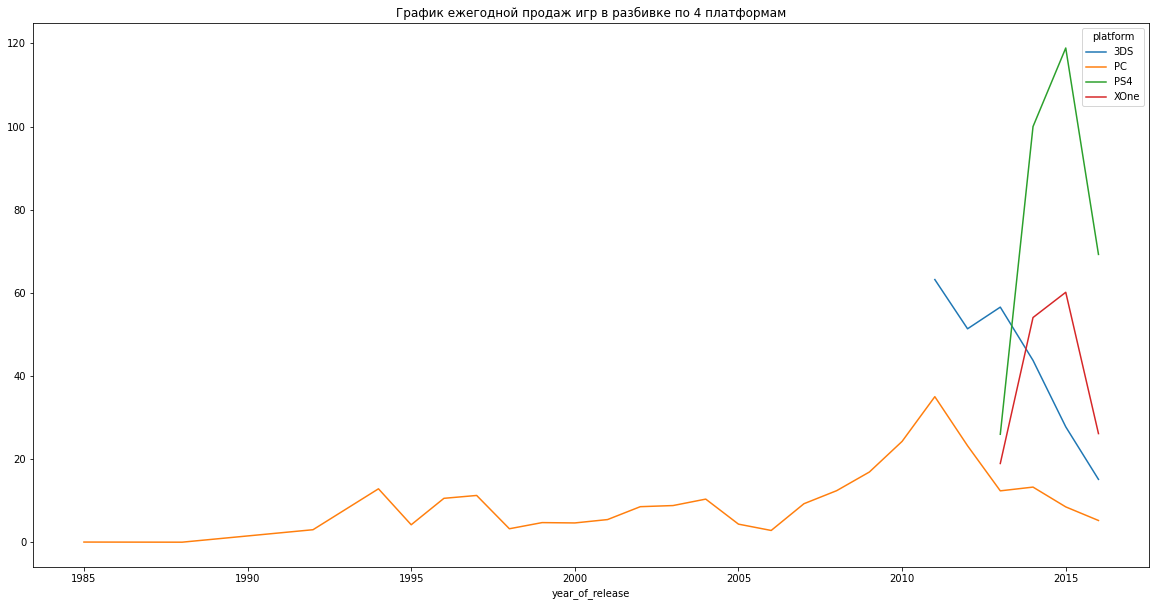

In [37]:
top_platforms1 = ['3DS', 'PS4', 'PC', 'XOne']
df[df['platform'].isin(top_platforms1)].groupby(['platform', 'year_of_release'])['sales'].sum().unstack('platform').plot( figsize = (20, 10))
plt.title('График ежегодной продаж игр в разбивке по 4 платформам')
plt.show()

Возьмем данные за соответствующий актуальный период,  определенный ранее. Это семь лет, начиная с 2009 года

In [38]:
df_2009 = df[df['year_of_release']> 2008]
df_2005 = df[df['year_of_release']> 2004] # в то же время несправедливо сравнивать 
# платформы на излете с только стартующими - про запас у нас еще и десятилетняя база данных, посмотреть поподробнее.

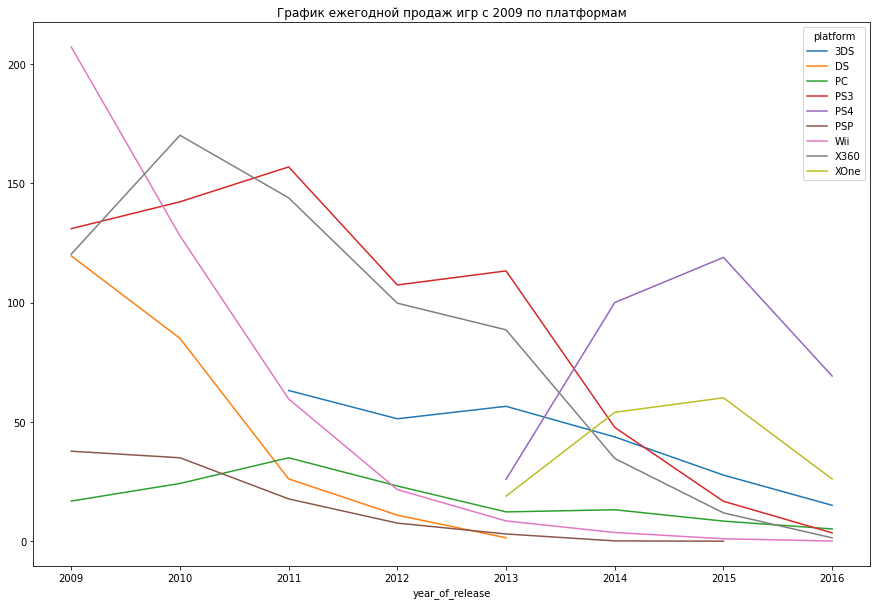

In [39]:
df_2009[df_2009['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['sales'].sum().unstack('platform').plot( figsize = (15, 10))
plt.title('График ежегодной продаж игр c 2009 по платформам')
plt.show()

Посмотрим, какие платформы лидируют по продажам, кто из них растет, а кто -  падает. На основе анализа выберем несколько потенциально прибыльных платформ.

In [40]:
df_act = df_2009.pivot_table(index= ['platform'],  values='sales', aggfunc=['count', 'sum', 'mean']).reset_index()
df_act.columns = ['platform', 'release', 'amount', 'mean']
df_act.sort_values(by= 'amount', ascending = False)


,platform,release,amount,mean
4,PS3,1051,718.67,0.683796
10,X360,852,670.70,0.787207
8,Wii,775,429.94,0.554761
5,PS4,392,314.14,0.801378
0,3DS,512,257.81,0.503535
1,DS,910,243.29,0.267352
11,XOne,247,159.32,0.645020
2,PC,586,138.87,0.236980
6,PSP,661,101.83,0.154054
9,WiiU,147,82.19,0.559116


Справедливости ради - в 2016 падают все, даже недавно вышедшие платформы, даже удивительно. Хотя, почему удивительно, нас же предупредили, что данные за 2016 неполны, конечно, в представленных данных не хватает пояснений -  был ли выполнен пересчет в актуальных ценах, чтобы информация была сопоставимой, за сколько месяцев у нас данные 2016 года. В реальности - нужно получить пояснения у отдела - составителя базы.
    На первом месте - PS3, близко к ней - X360. И обе они, а также еще 7 из 12 крупных (по продажам) платформ катятся к закату. По-настоящему, чтобы Стримчику сделать ставку на потенциально популярный продукт и спланировать рекламные кампании - нужно сдать в музей все старые платформы - и PS4, Xone и 3DS. И немного в PC - эта тема постоянна. В такой же разбивке нужно свкладываться в рекламные кампании и отслеживать ожидаемые новинки. Явно пока не хватает блокбастеров, число релизов сейчас меньше, чем раньше  - и количество до качества тоже не дотянулось.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

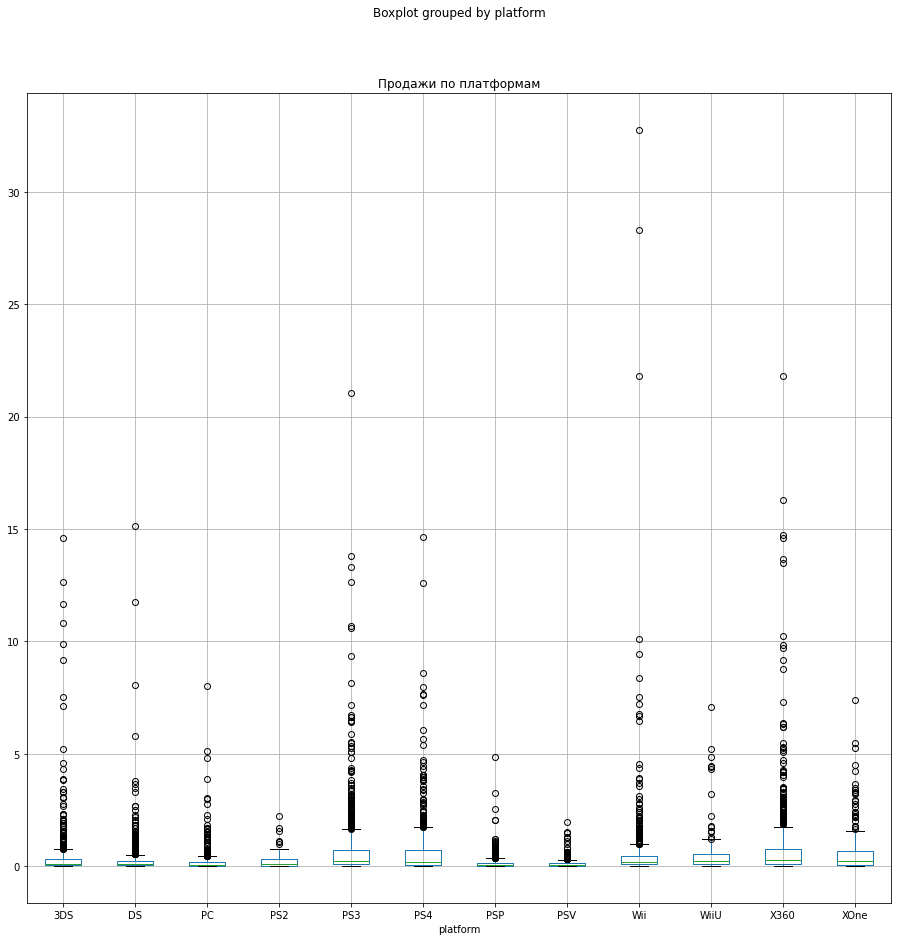

In [41]:
df_2009.boxplot(column='sales', by='platform', figsize = (15, 15)).set_title('Продажи по платформам')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
#plt.ylim(-0, 40)


Чемпион по хитам - WII, 3 игры свыше 20 млн. Следом идут PS3 и X360 - по одной. Интересно, мы сравниваем новичков,  с платформами на излете. Возьмем данные с 2005 года, чтобы взглянуть на монстров во всей красе:

Text(0.5, 1.0, 'Продажи по платформам')

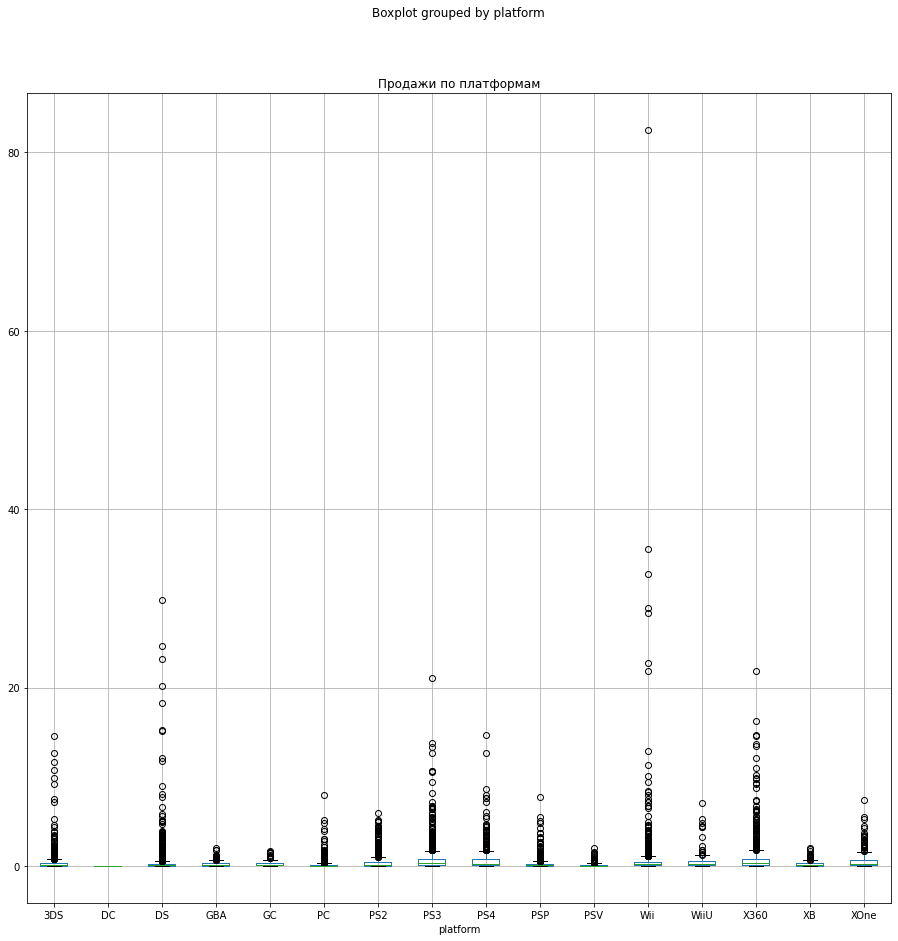

In [42]:
df_2005.boxplot(column='sales', by='platform', figsize = (15, 15)).set_title('Продажи по платформам')

В фавориты с хитами, несущими золотые яйца вошел и DS, 4 игры выше 20. а WII показала 7 игр, одна из которых - недостижимые для остальных свыше 80 млн! Но общая картина осталась похожей. Вот прямо интересно стало посмотреть на топ:

In [43]:
df_2005[df_2005['platform'] == 'Wii'].sort_values(by = 'sales',ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


На первом месте по продажам - Wii Sports. Вполне понятно - когда wii появилась - все хотели сращивания развлечения и пользы. Интересно, а что выстрелило у ее конкурента, Х360 с их кинектом?

In [44]:
df_2005[df_2005['platform'] == 'X360'].sort_values(by = 'sales',ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Ух ты, тоже их специалитет - Kinect Adventures! Да, как сладки были надежды выглядеть как Лара Крофт просто играя в игру. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве одной платформы выбрана PS3: самое большое количество релизов за жизненный цикл в актуальном периоде - 1017, на первом месте по выручке - 717млн, высокая докодность в расчете на игру - 0.705.

Построим диаграмму рассеяния и определим корреляцию между отзывами и продажами:


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='sales'>,
        <AxesSubplot:xlabel='sales', ylabel='sales'>]], dtype=object)

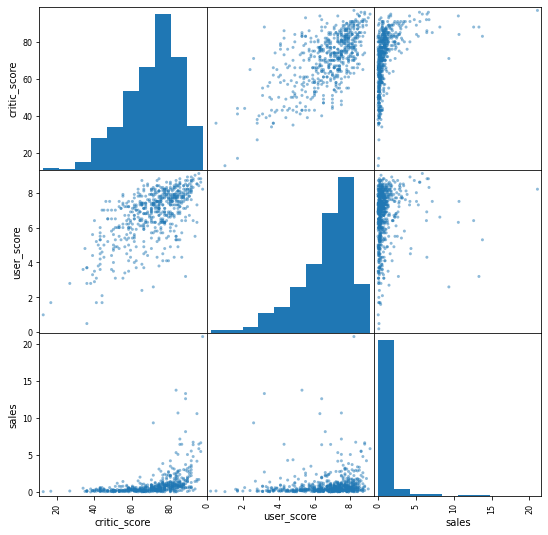

In [45]:
pd.plotting.scatter_matrix(df_2009[df_2009['platform'] == 'PS3'][['critic_score','user_score','rating','sales']] , figsize=(9, 9))

In [46]:
df_2009[df_2009['platform'] == 'PS3']['critic_score'].corr(df_2009[df_2009['platform'] == 'PS3']['sales'])

0.4179755809707026

На графике мы видим заметную линию, подтверждающую корреляцию между рейтингом критиков и продажами игр. Более того, при рейтинге свыше 70 происходит значительный отрыв от среднего уровня продаж. У нас в присутствует средняя прямая корреляция. Что же, хорошие игры хорошо продаются и получают высокий рейтинг. Интересно, а самый высокий рейтинг - у самой продаваемой игры?
Найдем максимальный рейтинг:

In [47]:
df_2009[df_2009['platform'] == 'PS3']['critic_score'].value_counts()

74.0    25
80.0    22
70.0    21
77.0    21
66.0    19
        ..
35.0     1
17.0     1
34.0     1
13.0     1
97.0     1
Name: critic_score, Length: 66, dtype: int64

In [48]:
df_2009[df_2009['platform'] == 'PS3']['critic_score'].max()

97.0

Посмотрим , какой игре(-ам) он соответствует.

In [49]:
df_2009[(df_2009['platform'] == 'PS3')&(df_2009['critic_score'] == 97.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


Да, здесь однозначное пересечение: рейтинг 97 (видимо, из 100) - и продажи 21 млн! Мы имеем дело явно с играющими критиками.

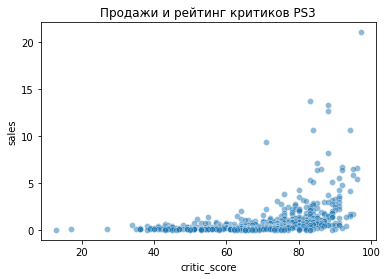

In [50]:
sns.scatterplot(data = df_2009[df_2009['platform']== 'PS3'], alpha = 0.5, x = 'critic_score', y= 'sales').set_title('Продажи и рейтинг критиков PS3')
plt.show()

Добавим параметр alpha равный 0.5, чтобы подчеркнуть связи, здесь и далее.


Видно, что на самом "дне" графика точки менее прозрачные, синий цвет в самом низу. Что значит, что именно в этих местах сосредоточено больше значений. 

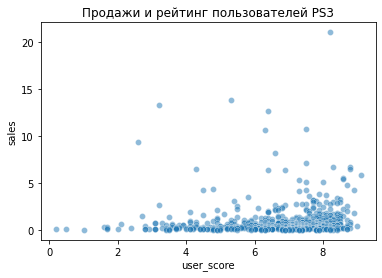

In [51]:
sns.scatterplot(data = df_2009[df_2009['platform']== 'PS3'],alpha = 0.5, x = 'user_score', y= 'sales').set_title('Продажи и рейтинг пользователей PS3')
plt.show()

А здесь мы видим, что рейтинг пользователей не совсем коррелирует с продажами. Наш хит, Grand Theft Auto V, с рейтингом чуть больше 8. И наиболее высокооценённые игры болтаются в интервале до 7 млн. Капризная публика игроки, вам же понравилось, покупайте! - но не тут-то было. И почти все хиты имеют оценку до 7. Посмотрим корреляцию.

In [52]:
df_2009[df_2009['platform']== 'PS3'][['critic_score','user_score','rating','sales']].corr()

,critic_score,user_score,sales
critic_score,1.000000,0.634093,0.417976
user_score,0.634093,1.000000,0.095400
sales,0.417976,0.095400,1.000000


Подтверждается, корреляция между рейтингом от критиков с продажами - 0.41, от пользвателей с продажами - всего лишь 0,10, слабая прямая зависимость. Но в целом, рейтинг пользователей и зрителей между собой коррелируют довольно сильно - 0,63. Что понравилось критикам нравится и пользователям, и наоборот.

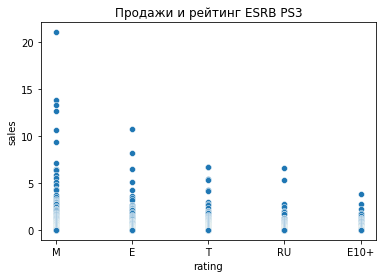

In [53]:
sns.scatterplot(data = df_2009[df_2009['platform']== 'PS3'], x = 'rating', y= 'sales').set_title('Продажи и рейтинг ESRB PS3')
plt.show()

Лучшие продажи в категории М - «Mature», игры предназначенные для людей от 17 лет. Следующим идет М - для всех, поскромнее результат  у Т - Teen, и самы скромный - у У10+ - для всех старше 10 лет. Нужно отметить, что PS3 не содержит всех рейтингов, разбили игры на 4 группы - и ладно, и так все понятно.

Посмотрим как рейтинги и продажи соотносятся по другим платформам:

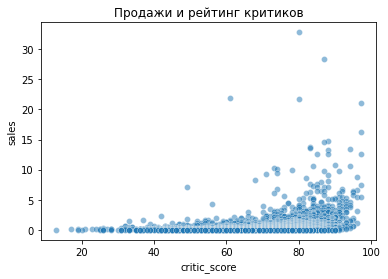

In [54]:
sns.scatterplot(data = df_2009,alpha = 0.5, x = 'critic_score', y= 'sales').set_title('Продажи и рейтинг критиков')
plt.show()

И снова на графике мы видим заметный подъем продаж высокорейтинговых игр, что подтверждает корреляцию между рейтингом критиков и продажами игр. При рейтинге свыше 70 сохраняется значительный отрыв от среднего уровня продаж.  Хор критиков немного снизил унисон, но тренд налицо. А что у пользователей?

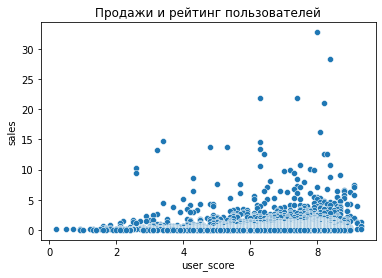

In [55]:
sns.scatterplot(data = df_2009, x = 'user_score', y= 'sales').set_title('Продажи и рейтинг пользователей')
plt.show()

По-прежнему разнобой. Но, кажется, что корреляция стала чуть отчетливее, проверим на цифрах:

In [56]:
df_2009[['critic_score','user_score','rating','sales']].corr()

,critic_score,user_score,sales
critic_score,1.000000,0.568935,0.295362
user_score,0.568935,1.000000,0.071432
sales,0.295362,0.071432,1.000000


Рейтинг критиков и продажи: у нас в присутствует средняя прямая корреляция. Что же, хорошие игры хорошо продаются и получают высокий рейтинг. Рейтинг пользователей и продажи: слабая прямая корреляция. И нет, она не стала сильнее, цифры даже чуть ниже, чем по PS3. Критики опять разбираются лучше. 
И посмотрим на рейтинг:

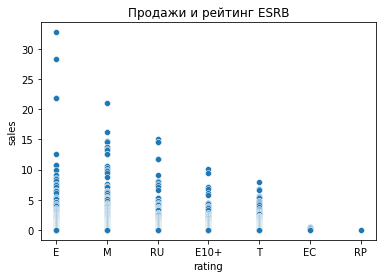

In [57]:
sns.scatterplot(data = df_2009, x = 'rating', y= 'sales').set_title('Продажи и рейтинг ESRB')
plt.show()

Фаворит поменялся - лучшие продажи теперь в категории Е - для всех. Следующим идет  М - «Mature», игры предназначенные для людей от 17 лет. И в 3 - 4 местах тоже перестановка, **на призовое 3 место вышел наш "неопределенный рейтинг"** Е10+ опережает Т - Teen. Самые скромные результаты у EC (Early childhood - Для детей младшего возраста)  и RP (Rating Pending - Рейтинг ожидается). У  PS3 не было  EC и RP. Видимо, ЕС входит в группу Е. А RP нет, поскольку процесс присвоения рейтинга  налажен.

В расчетах выше так хотелось посмотреть на мастодонтов в расцвете, на пиковые цифры, а они выпадали, поэтому период был расширен. И сразу заметно, что в настоящем очень не хватает блокбастеров. И понятно, что в текущий момент геймеры ждут чего-то, может быть, Киберпанка 2077 -  и всё изменится. Тем не менее, далее - только об актуальном. 


### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам

,mean,sum
genre,,
Action,0.458846,810.78
Adventure,0.115548,81.23
Fighting,0.450357,113.49
Misc,0.396893,310.37
Platform,0.880495,160.25
Puzzle,0.209275,40.39
Racing,0.487134,156.37
Role-Playing,0.540373,362.59
Shooter,1.098060,549.03


Text(0.5, 1.0, 'Продажи игр по жанрам')

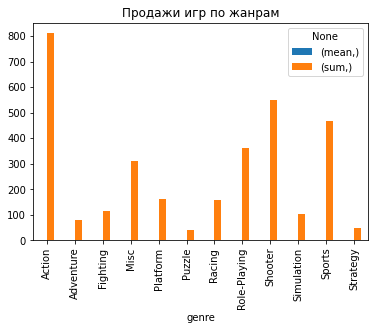

In [58]:
df_genre = pd.pivot_table(df_2009, index='genre', values='sales', aggfunc=['mean','sum'])#.reset_index()
df_genre.columns = [['mean', 'sum']]
display(df_genre)#.sort_values(by = 'sum', ascending =  False ))
df_genre.plot(kind = 'bar').set_title('Продажи игр по жанрам')

Cамые прибыльные жанры: 0 Action - 1196, 10 Sports - 851, 8 Shooter - 758. Спорт обгоняет шутеры!!! Полагаю, что это из-за старта WII и Х360 с их спортивными блокбастерами, такое десятилетие вышло. Есть и жанры с низкими продажами: 11 Strategy - 78, 5 Puzzle - 110, 1 Adventure - 142.
Среднее значение "тонет" из-за несопоставимости с общими продажами. Посмотрим на него отдельно:

<div class="alert alert-info">
<b> Комментарий студента </b> И вот плоды изменения периода, на котором ты настаивала: на первом месте Action - 811, Shooter - 549 на втором, а спорт Sports - 466 - на третьем. Все вернулось на круги своя, зря я так удивлялась. Пик спорта был кратковременным. </div>    

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v.2) </b>  
    
Хотя казалось бы, невелика разница в годах 🙂 </div>

Text(0.5, 1.0, 'Продажи игр по жанрам, средние значения')

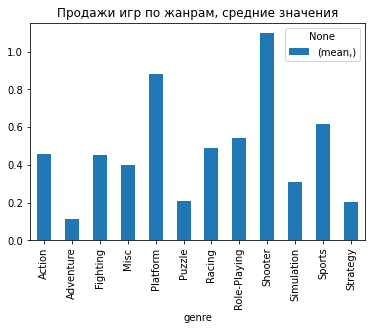

In [59]:
df_genre['mean'].plot(kind = 'bar').set_title('Продажи игр по жанрам, средние значения')

In [60]:
display(df_genre)

,mean,sum
genre,,
Action,0.458846,810.78
Adventure,0.115548,81.23
Fighting,0.450357,113.49
Misc,0.396893,310.37
Platform,0.880495,160.25
Puzzle,0.209275,40.39
Racing,0.487134,156.37
Role-Playing,0.540373,362.59
Shooter,1.098060,549.03


<div class="alert alert-info">
<b> Комментарий студента </b>  Cамое высокое среднее значение у жанров: Shooter - 1,098 Platform - 0.88, Sports - 0.614. За шутер, тем не менее, готовы платить в среднем больше. Самые низкие цифры по средним продажам у Puzzle - 0.209, Strategy - 0.206,  Adventure - 0.115. Цифры немного поменялись, средние значения подросли. Интересно,  датасет изначально составлен в сопоставимых ценах? Надеюсь, что да. </div>    


### Региональный портрет пользователя

**Самые популярные платформы (топ-5)

Text(0.5, 1.0, 'Продажи игр по платформам в регионах')

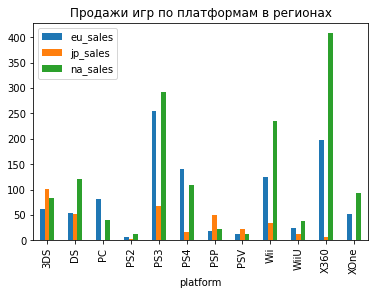

In [61]:
df_reg_platform = pd.pivot_table(df_2009, index='platform', values=['na_sales', 'eu_sales' , 'jp_sales'], aggfunc='sum')#.reset_index()
df_reg_platform.columns 
df_reg_platform.plot(kind = 'bar').set_title('Продажи игр по платформам в регионах')

In [62]:
display(df_reg_platform.sort_values(by= 'jp_sales', ascending = False ))

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.27,100.62,82.65
PS3,255.00,68.29,291.90
DS,53.89,52.11,120.61
PSP,18.24,50.39,22.27
Wii,124.22,34.32,235.75
PSV,13.07,21.84,12.47
PS4,141.09,15.96,108.74
WiiU,25.13,13.01,38.10
X360,196.72,7.41,408.18


In [63]:
data = {'NA':['X360', 'Wii', 'PS3', 'DS','PS2'], 'EU':['PS3', 'X360', 'Wii', 'DS','PS4'], 'JP':[ '3DS', 'PS3','DS','PSP','Wii']} 
# Creates pandas DataFrame. 
df_plt = pd.DataFrame(data, index =['Гран При', '1 место', '2 место', '3 место', '4 место']) 
df_plt.head()

,NA,EU,JP
Гран При,X360,PS3,3DS
1 место,Wii,X360,PS3
2 место,PS3,Wii,DS
3 место,DS,DS,PSP
4 место,PS2,PS4,Wii


<div class="alert alert-info">
<b> Комментарий студента </b>  После изменения (сокращения) актуального периода, изменения были только у Японии, 'DS' ушла на 3е место, Wii сползла на пятое место. </div>    


Во всех регионах PS3 входит в первую тройку. США и Европа тасуют одних и тех же участников на 1-3 месте, сдвиг только по местам. На четвертом месте в США и Европе - DS, а в Японии - на первом! Разница между США и Европой подчеркнута пятым местом - в США это PS2, а в Европе - PS4. США доигрывает в старую платформу, а в Европе, старушке Европе, в фавориты рвется новое.

**Самые популярные жанры (топ-5)**

Text(0.5, 1.0, 'Продажи игр по жанрам в регионах')

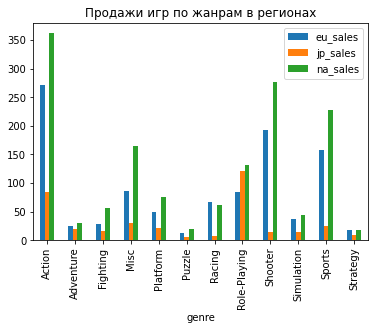

In [64]:
df_reg_genre = pd.pivot_table(df_2009, index='genre', values=['na_sales', 'eu_sales' , 'jp_sales'], aggfunc='sum')#.reset_index()
df_reg_genre.columns 
df_reg_genre.plot(kind = 'bar').set_title('Продажи игр по жанрам в регионах')

In [65]:
display(df_reg_genre.sort_values(by= 'na_sales', ascending = False ))

,eu_sales,jp_sales,na_sales
genre,,,
Action,271.91,84.16,361.72
Shooter,192.30,15.16,276.37
Sports,158.51,25.32,227.66
Misc,86.27,30.09,164.40
Role-Playing,83.56,120.61,130.83
Platform,49.68,20.65,74.93
Racing,67.63,7.18,61.04
Fighting,27.74,16.92,56.56
Simulation,37.90,14.25,43.74


In [66]:
data = {'NA':['Action',  'Shooter', 'Sports', 'Misc','Role-Playing'], 'EU':['Action',  'Shooter','Sports', 'Misc','Role-Playing'], 'JP':['Role-Playing', 'Action', 'Misc','Sports','Platform']} 
# Creates pandas DataFrame. 
df_gt = pd.DataFrame(data, index =['Гран При', '1 место', '2 место', '3 место', '4 место']) 
df_gt.head()

,NA,EU,JP
Гран При,Action,Action,Role-Playing
1 место,Shooter,Shooter,Action
2 место,Sports,Sports,Misc
3 место,Misc,Misc,Sports
4 место,Role-Playing,Role-Playing,Platform


И снова есть единство предпочтений пользователей из США и Европы. Полное совпадение первых четырех мест! На пятом месте в США - жанр Role-Playing, в Европе - Racing. Картина в Японии существенно другая, снова аутсайдер с пятого места - на первом, речь о жанре Role-Playing. Разницу увеличивает и жанр Platform (7е место в Европе и США). Misc c 4го места в Европе и США поднимается на 3е в Японии. Однозначно, Япония отличается и полна загадок.

<div class="alert alert-info">
<b> Комментарий студента </b>  После изменения (сокращения) актуального периода, Shooter вытеснил Sports на 3е место в США, В Европе Role-Playing сместил с пятого места Racing. </div>    

### рейтинг ESRB и его влияние на продажи по регионам

In [67]:
df_rate_mean = pd.pivot_table(df_2009, index='rating', values=['na_sales', 'eu_sales' , 'jp_sales'], aggfunc='mean').reset_index()

In [68]:
display(df_rate_mean)

,rating,eu_sales,jp_sales,na_sales
0,E,0.190459,0.044785,0.293634
1,E10+,0.152610,0.026123,0.254630
2,EC,0.000000,0.000000,0.220000
3,M,0.388228,0.042366,0.524209
4,RP,0.030000,0.000000,0.000000
5,RU,0.064447,0.076968,0.073893
6,T,0.138590,0.045741,0.205344


In [69]:
df_rate_sum = pd.pivot_table(df_2005, index='rating', values=['na_sales', 'eu_sales' , 'jp_sales'], aggfunc='sum')#.reset_index()

In [70]:
display(df_rate_sum)

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,508.71,147.33,873.10
E10+,181.92,39.05,343.02
EC,0.11,0.00,1.53
M,414.11,46.23,607.34
RP,0.03,0.00,0.00
RU,253.45,291.65,323.49
T,258.17,91.32,479.08


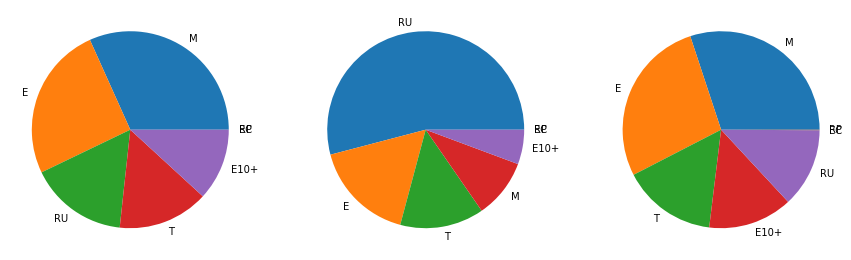

In [71]:
countries = ['eu_sales','jp_sales','na_sales']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
  df_res = (df_2009.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False))

  axs[i].pie(df_res[countries[i]], labels = df_res['rating'])

<div class="alert alert-info">
<b> Комментарий студента </b>  После изменения (сокращения) актуального периода и присоединения потерянных пропусков, различия ещё очевиднее: E остался на первом месте только в США и Европе, а в Японии на первом месте рейтинг RU. Это логично, поскольку ранее мы выяснили, что именно для этого региона часто отсутствует - если не планируется выход на рынок США, зачем получать их рейтинг. Но это и грустно - мы не узнаем достоверно, что там на самом деле. Одно мы знаем точно, в Японии львиную долю продаж занимает что-то свое, родное. На втором месте E, которые в остальных регионах идут на первом месте, а далее - Т, игры для тинейджеров. Загадочен Японский рынок.  </div>    

## Проверка гипотез



### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сравним наши выборки для того, чтобы понять как отличается их среднее и является ли это случайностью. Подготовим данные:

In [72]:
rating_xone = df_2009[df_2009['platform']== 'XOne']['user_score'].dropna().reset_index(drop = True)
rating_pc = df_2009[df_2009['platform']== 'PC']['user_score'].dropna().reset_index(drop = True)

In [73]:
print('Средний рейтинг пользователей:')
print('платформа XOne: ', pd.Series(rating_xone).mean())
print('платформа PC: ', pd.Series(rating_pc).mean())

Средний рейтинг пользователей:
платформа XOne:  6.521428571428572
платформа PC:  6.652078774617068


In [74]:
rating_xone.count()

182

In [75]:
rating_pc.count()

457

Наши выборки достаточно большие для проведения статистического теста на равенство среднего совокупности некоторому числу.

В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind.

Так как выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, при проверки гипотезы t-тестом установим параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.

In [76]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    rating_xone, 
    rating_pc,
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.29856178733970584
Не получилось отвергнуть нулевую гипотезу


p-значение: 0.298, не получилось отвергнуть нулевую гипотезу. Средние наших совокупностей равны, а значит,  равны  средние пользовательские рейтинги платформ Xbox One и PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сравним наши выборки рейтинга пользователей по жанрам для того, чтобы понять как отличается их среднее и является ли это случайностью. Подготовим данные:

In [77]:
rating_action = df_2009[df_2009['genre']== 'Action']['user_score'].dropna().reset_index(drop = True)
rating_sports = df_2009[df_2009['genre']== 'Sports']['user_score'].dropna().reset_index(drop = True)

In [78]:
print('Средний рейтинг пользователей:')
print('жанр Action: ', pd.Series(rating_action).mean())
print('жанр Sports: ', pd.Series(rating_sports).mean())

Средний рейтинг пользователей:
жанр Action:  6.81741452991453
жанр Sports:  6.105250000000001


In [79]:
rating_action.count()

936

In [80]:
rating_sports.count()

400

Наши выборки достаточно большие для проведения статистического теста на равенство среднего совокупности некоторому числу.

В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средние пользовательские рейтинги жанров Action и Sports одинаковые. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind.

Так как выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, при проверки гипотезы t-тестом установим параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.


In [81]:
alpha = 0.05 

results = st.ttest_ind(
    rating_action, 
    rating_sports,
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.493323839142059e-13
Отвергаем нулевую гипотезу


p-значение: 0.00006, отвергаем нулевую гипотезу. Средние наших совокупностей не равны, а значит, не равны средние пользовательские рейтинги жанров Action и Sports и гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные подтверждается.

## Общий вывод

В настоящем проекте мы выполнили анализ продаж интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Доступны данные из открытых источников: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Наша задача - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных • Name — название игры • Platform — платформа • Year_of_Release — год выпуска • Genre — жанр игры • NA_sales — продажи в Северной Америке (миллионы проданных копий) • EU_sales — продажи в Европе (миллионы проданных копий) • JP_sales — продажи в Японии (миллионы проданных копий) • Other_sales — продажи в других странах (миллионы проданных копий) • Critic_Score — оценка критиков (максимум 100) • User_Score — оценка пользователей (максимум 10) • Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Таблица содержит пропуски в столбцax Genre, Year_of_Release, Critic_Score, User_Score, Rating. Датафрейм содержит 1002 явных дубликата. Данные в столбце 'Year_of_Release' являются датами, выраженными целым числом (год), необходимо изменить тип данных. В столбцах first_name и 'last_name' данные представлены строками в разных регистрах. В наименованиях столбцов сочетание строчных и прописных букв, в остальном используется "змеиный" стиль, наименования соотносятся с информацией в столбцах по смыслу.
Выполнена Предобработка данных. Удалены дубликаты. Изменен тип данных: названия столбцов приведены к нижнему регистру; данные в столбце 'Year_of_Release' заменены на целочисленные с помощью метода astype, Int64, чтобы избежать ошибки, связанной с пропусками. Столбец 'User_Score' приведен к числовым значениям.
Произведены анализ и последующая обработка пропусков. Произведена оценка доли пропусков и их влияния на достоверность информации. Принято решение не заполнять пропуски, так как отсутствует базис для этого.
Рассчитан общий объем продаж. Данные готовы к исследовательскому анализу.
Исследовано, какое количество игр выпускалось в разные годы. График имеет ярко выраженный пик в 2008-2009 годах, что подтверждается числовыми значениями.
Выявлены платформы с наибольшими суммарными продажами. Затем построено распределение по годам по 15 наиболее весомым платформам и XOne, судя по графику - она из начинающих, а полных данных за 2016 еще нет.
Построен график наглядно показывает, что характерный срок за который исчезают старые платформы - 7 лет. Дальше тянется узкий хвост, поддерживаемый особыми ценителями. Новые платформы появляются регулярно, за 10 лет меняются 2 поколения. Данные подтверждаются цифровыми показателями.
в 2016 году «падают» все, даже недавно вышедшие платформы, удивительно. Считаем, что это из-за того, что данные за 2016 неполны. Конечно, в представленных данных не хватает пояснений - был ли выполнен пересчет в актуальных ценах, чтобы информация была сопоставимой, за сколько месяцев у нас данные 2016 года. В реальности - нужно получить пояснения у отдела - составителя базы. На первом месте - PS3, близко к ней - X360. И обе они, а также еще 7 из 12 крупных (по продажам) платформ катятся к закату. По-настоящему, чтобы Стримчику сделать ставку на потенциально популярный продукт и спланировать рекламные кампании - нужно сдать в музей все старые платформы - и PS4, Xone b 3DS. И немного в PC - эта тема постоянна. В такой же разбивке нужно вкладываться в рекламные кампании и отслеживать ожидаемые новинки. Явно пока не хватает блокбастеров, число релизов сейчас меньше, чем раньше - и количество до качества тоже не дотянулось. 
Чемпион по хитам - WII, 3 игры свыше 20 млн. Следом идут PS3 и X360 - по одной. Интересно, мы сравниваем новичков, с платформами на излете. Для сопоставимости данных возьмем данные с 2005 года
Посмотрим, как влияют на продажи внутри популярной платформы отзывы пользователей и критиков. В качестве одной платформы выбрана PS3: самое большое количество релизов за жизненный цикл в актуальном периоде - 1017, на первом месте по выручке - 717млн, высокая доходность в расчете на игру - 0.705.
На графике мы видим заметную линию, подтверждающую корреляцию между рейтингом критиков и продажами игр. Более того, при рейтинге свыше 70 происходит значительный отрыв от среднего уровня продаж. У нас присутствует средняя прямая корреляция. Что же, хорошие игры хорошо продаются и получают высокий рейтинг. 
А вот рейтинг пользователей не совсем коррелирует с продажами. Наш хит, Grand Theft Auto V, с рейтингом чуть больше 8. И наиболее высокооценённые игры болтаются в интервале до 7 млн по продажам. Капризная публика игроки, вам же понравилось, покупайте! - но не тут-то было. И почти все хиты имеют оценку до 7. 
Это подтверждается и числовым анализом корреляции:  корреляция между рейтингом от критиков с продажами - 0.41, от пользвателей с продажами - всего лишь 0,10, слабая прямая зависимость. Но в целом, рейтинг пользователей и зрителей между собой коррелируют довольно сильно - 0,63. Что понравилось критикам нравится и пользователям, и наоборот.
По рейтингу ESRB  - лучшие продажи в категории М - «Mature», игры предназначенные для людей от 17 лет. Следующим идет М - для всех, поскромнее результат у Т - Teen, и самый скромный - у У10+ - для всех старше 10 лет. Нужно отметить, что PS3 не содержит всех рейтингов, разбили игры на 4 группы - и ладно, и так все понятно.
Посмотрим как рейтинги и продажи соотносятся по другим платформам:
И снова на графике мы видим заметный подъем продаж высокорейтинговых игр, что подтверждает корреляцию между рейтингом критиков и продажами игр. При рейтинге свыше 70 сохраняется значительный отрыв от среднего уровня продаж. Хор критиков немного снизил унисон, но тренд налицо. А что у пользователей?
Рейтинг критиков и продажи: у нас в присутствует средняя прямая корреляция. Что же, хорошие игры хорошо продаются и получают высокий рейтинг. Рейтинг пользователей и продажи: слабая прямая корреляция. И нет, она не стала сильнее, цифры даже чуть ниже, чем по PS3. Критики опять разбираются лучше. 
По рейтингу ESRB  - фаворит поменялся - лучшие продажи теперь в категории Е - для всех. Следующим идет М - «Mature», игры предназначенные для людей от 17 лет. И в 3 - 4 местах тоже перестановка, Е10+ опережает Т - Teen. Самые скромные результаты у EC (Early childhood - Для детей младшего возраста) и RP (Rating Pending - Рейтинг ожидается). У PS3 не было EC и RP. Видимо, ЕС входит в группу Е. А RP нет, поскольку процесс присвоения рейтинга налажен.
Cамые прибыльные жанры: 0 Action - 1196, 10 Sports - 851, 8 Shooter - 758. Спорт обгоняет шутеры!!! Полагаю, что это из-за старта WII и Х360 с их спортивными блокбастерами, такое десятилетие вышло. Есть и жанры с низкими продажами: 11 Strategy - 78, 5 Puzzle - 110, 1 Adventure – 142
Cамое высокое среднее значение у жанров: 8 Shooter - 0,914,4 Platform - 0.719, 10 Sports - 0.629. За шутер, тем не менее, готовы платить в среднем больше. Самые низкие цифры по средним продажам у 11 Strategy - 0.191, 1 Adventure - 0.194, 5 Puzzle - 0.284. Та же троица, немного другой порядок.
Региональный портрет пользователя
Платформы. Во всех регионах PS3 входит в первую тройку. США и Европа тасуют одних и тех же участников на 1-3 месте, сдвиг только по местам. На четвертом месте в США и Европе - DS, а в Японии - на первом! Разница между США и Европой подчеркнута пятым местом - в США это PS2, а в Европе - PS4. США доигрывает в старую платформу, а в Европе, старушке Европе, в фавориты рвется новое.
Жанры. И снова есть единство предпочтений пользователей из США и Европы. Полное совпадение первых четырех мест! На пятом месте в США - жанр Role-Playing, в Европе - Racing. Картина в Японии существенно другая, снова аутсайдер с пятого места - на первом, речь о жанре Role-Playing. Разницу увеличивает и жанр Platform (7е место в Европе и США). Misc c 4го места в Европе и США поднимается на 3е в Японии. Однозначно, Япония отличается и полна загадок.
рейтинг ESRB и его влияние на продажи по регионам
Лучшие продажи в категории Е - для пользователей всех возрастов во всех регионах. Далее - М - «Mature», игры предназначенные для людей от 17 лет в США и Европе, а в Японии - следующим идет Т - Teen, а М - на третьем месте. В США и Европе на третьем месте Т. И следующий большой кусок, то есть 4 место (остальные доли почти незаметны - это Е10+.

Проверка гипотез
Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
отвергаем нулевую гипотезу. Средние наших совокупностей  равны, а значит,  равны средние пользовательские рейтинги платформ Xbox One и PC, **не отвергаем гипотезу 1**.
Гипотеза 2: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
отвергаем нулевую гипотезу. Средние наших совокупностей не равны, а значит, не равны средние пользовательские рейтинги жанров Action и Sports и гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, **Гипотеза 2 подтверждается**.


<div class="alert alert-info">
<b> Краткий вывод </b> В настоящем проекте мы выполнили анализ продаж интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Доступны данные из открытых источников: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Наша задача - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    На основе проделанного анализа, предлагаем сделать ставку и распределить бюджет рекламных кампаний между жанрами Action и Shooter, игры с рейтингом Е  - для всех  и и М - «Mature», игры предназначенные для людей от 17, платформы: '3DS', 'PS4', 'PC', 'XOne'. Кроме Японии, для этого региона рейтинги RU и Е, жанры - Role-Playing и Action. И особенно, особенно важно отдать большой кусок бюджета на игру, если она попадает во все топовые категории - вдруг это будущий хит! 
</div>    

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файл изучен (выведены первые строки, метод info(), describe())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: столбец общая сумма продаж
- [x]  произведено исследование продаж по годам
- [x]  выявлены платформы с наибольшими суммарными продажами
- [x]  проанализирован актуальный период для оценки показателей исследования
- [x]  проанализировано, какие платформы лидируют по продажам, кто из них растет, а кто - падает
- [x]  оценена связь между разными видами отзывов и продажами
- [x]  проанализировано распределение игр по жанрам
- [x]  проанализирован региональный портрет пользователя
- [x]  проверена гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- [x]  проверена гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
- [x]  в каждом этапе есть выводы

- [x]  есть общий вывод